# Lec 4: Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent optimization algorithm commonly used in Machine Learning to train models.

In traditional Gradient Descent, the model's parameters are updated based on the average gradient of the loss function computed over the entire dataset. However, this can be computationally expensive for large datasets, and the optimization can get stuck in local minima.

SGD addresses these issues by computing the gradient of the loss function using only a small subset of the data, known as a "mini-batch". Instead of computing the average gradient over the entire dataset, the parameters are updated using the gradient computed on the mini-batch.

SGD has several advantages over traditional Gradient Descent. First, it can converge much faster because the updates are performed more frequently. Second, it can handle larger datasets because it only needs to compute the gradients on a subset of the data at a time. Finally, it can help avoid getting stuck in local minima because the mini-batches are randomly selected.

However, SGD can also have some drawbacks. It can be more noisy than traditional Gradient Descent because the mini-batches are randomly selected and may not be representative of the entire dataset. It can also require more tuning of the learning rate and other hyperparameters.

# Generate Our Data points

In [ ]:
from random import Random
from math import sqrt
from math import ceil
SEED = 10
rand_gen=Random(SEED)
# initalizing with seed to get the same sequence of numbers at every time we run the cell
def generate_data(N=1000):
    vecx,vecy=[],[]
    for _ in range(N):
        vecx.append(rand_gen.uniform(a=0,b=1))
        vecy.append(rand_gen.uniform(a=0,b=1))
    return vecx,vecy

def loss(x_p,y_p,batchx,batchy):
      return (1/len(batchx)*
      sum([sqrt((x_i-x_p)**2+(y_i-y_p)**2) for x_i,y_i in zip(batchx,batchy)]))
      

def calc_grad(x_p,y_p,batchx,batchy):
          sum_x=0;sum_y=0
          for x_i,y_i in zip(batchx,batchy):
              invsqrt = ((x_i-x_p)**2+(y_i-y_p)**2)**(-0.5)
              sum_x+=invsqrt*(x_i-x_p);
              sum_y+=invsqrt*(y_i-y_p);
          return -sum_x/len(batchx), -sum_y/len(batchy)
      

datax,datay=generate_data()

sampler = Random(SEED)
# Subset is called batch
x_p_gd,y_p_gd=0.3,0.3  # for GD
x_p_sgd,y_p_sgd=0.3,0.3 # for stochastic GD 
loss_sgd,loss_gd = [],[]
EPOCHS = 100 # Number of times to visit the WHOLE dataset
BATCh_SZ = 4 # in sgd , num of points contributing to gradient estimate in one update
indices = [ i for i in range(len(datax))]
N = len(datax)
Num_Batch = ceil(N/BATCh_SZ)
DELTA = 1e-2
for _ in range(EPOCHS):
     sampler.shuffle(indices)
     # SGD
     for batch_ind in range(Num_Batch):
             batch_indices = indices[ batch_ind*BATCh_SZ:(batch_ind+1)*BATCh_SZ]
             batch_x = [ datax[i] for i in batch_indices]
             batch_y = [ datay[i] for i in batch_indices]
             grad_x_sgd,grad_y_sgd = calc_grad(x_p_sgd,y_p_sgd,batch_x,batch_y)
             x_p_sgd-= DELTA * grad_x_sgd
             y_p_sgd-= DELTA * grad_y_sgd
             loss_sgd.append(loss(x_p_sgd,y_p_sgd,datax,datay))
     
    # GD
     grad_x_gd,grad_y_gd = calc_grad(x_p_gd,y_p_gd,datax,datay)
     x_p_gd-= DELTA * grad_x_gd
     y_p_gd-= DELTA * grad_y_gd
     loss_gd.append(loss(x_p_gd,y_p_gd,datax,datay))
print(x_p_sgd,y_p_sgd)

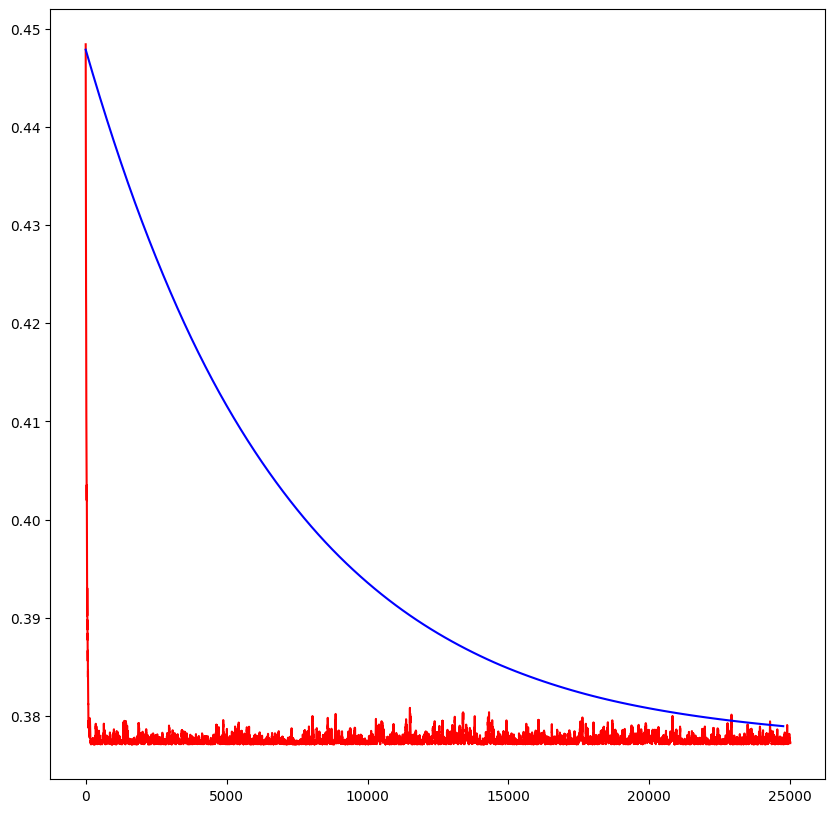

In [6]:
# Plotting
from matplotlib.pyplot import figure
fig = figure( figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(loss_sgd , "r")
ax.plot( [ i*Num_Batch for i in range(len(loss_gd))] , loss_gd, "b")
fig.show()

you can observe that sgd converges faster than gd here but with small DELTA 
as if we user larger one sgd may fail and never converges
so some solutions to make more batches or move with small delta to be confident about moving in the right gradient direction and converges at some point

as we get closer to compare the convergence of sgd with gd we can observe that sgd convergence is noisy
if we set x,y limits 

In [7]:
# ax2.set_xlim(24000,25000)
# ax2.set_ylim(0.38,0.39)

# A noisy estimator of the gradient from SGD